In [2]:
%config InlineBackend.figure_format = 'retina'
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# [International Mathmatics Olympiad 2021](https://www.imo-official.org/problems.aspx) - Problem 2

![IMO Logo](https://www.imo-official.org/IMOLogo.gif)


Show that the inequality

$
\begin{equation}
\sum_{i=1}^{n} \sum_{j=1}^{n} \sqrt{|x_i - x_j|} \le \sum_{i=1}^{n} \sum_{j=1}^{n} \sqrt{|x_i + x_j|}
\end{equation}
$

holds for all real numbers $x_1, ...,  x_n$.



<p>

Shubhanshu Mishra (<a href="https://shubhanshu.com">shubhanshu.com</a>)
    
![Twitter Follow](https://img.shields.io/twitter/follow/TheShubhanshu?style=social) 
![YouTube Channel Subscribers](https://img.shields.io/youtube/channel/subscribers/UCZpSoW1pm0jk-jUaGwVWzLA?style=social)
    
</p>    

$
\begin{equation}
\sum_{i=1}^{n} \sum_{j=1}^{n} \color{red}{\sqrt{|x_i - x_j|}} \le \sum_{i=1}^{n} \sum_{j=1}^{n} \color{blue}{\sqrt{|x_i + x_j|}} \\
\Rightarrow \sum_{i=1}^{n} \sum_{j=1}^{n} \color{red}{\sqrt{|x_i - x_j|}} - \sum_{i=1}^{n} \sum_{j=1}^{n} \color{blue}{\sqrt{|x_i + x_j|}} \le 0 \\
\Rightarrow \sum_{i=1}^{n} \sum_{j=1}^{n} \color{blue}{\sqrt{|x_i + x_j|}} - \sum_{i=1}^{n} \sum_{j=1}^{n} \color{red}{\sqrt{|x_i - x_j|}} \ge 0 \\
\end{equation}
$

$
\begin{equation}
f(X) = \sum_{i=1}^{n} \sum_{j=1}^{n} \color{blue}{\sqrt{|x_i + x_j|}} - \sum_{i=1}^{n} \sum_{j=1}^{n} \color{red}{\sqrt{|x_i - x_j|}}, \\
X = \{x_1, x_2, ...., x_n\}
\end{equation}
$

$
\begin{equation}
F(X) = \sum_{i=1}^{n} \sum_{j=1}^{n} \color{blue}{\sqrt{|x_i + x_j|}} - \color{red}{\sqrt{|x_i - x_j|}}
\end{equation}
$

Our goal is to show: 

$
\begin{equation}
F(X) \ge 0; \forall X \in \mathbb{R}^n
\end{equation}
$

Now let us consider the term $\color{blue}{\sqrt{|x_i + x_j|}} - \color{red}{\sqrt{|x_i - x_j|}}$, which we are going to call $f(i,j)$, i.e.

$
\begin{equation}
f(i,j) = \color{blue}{\sqrt{|x_i + x_j|}} - \color{red}{\sqrt{|x_i - x_j|}}
\end{equation}
$

This now converts the original $F(X)$ as follows:

$
\begin{equation}
F(X) = \sum_{i=1}^{n} \sum_{j=1}^{n} f(i,j)
\end{equation}
$

We can note that $f(i,j) = f(j,i)$

$
\begin{equation}
f(j,i) = \color{blue}{\sqrt{|x_i + x_j|}} - \color{red}{\sqrt{|x_j - x_i|}} \\
= \color{blue}{\sqrt{|x_i + x_j|}} - \color{red}{\sqrt{|-(x_i - x_j)|}} \\
\because |-x| = |x| \\
\Rightarrow f(j,i) = \color{blue}{\sqrt{|x_i + x_j|}} - \color{red}{\sqrt{|x_i - x_j|}} = f(i,j)
\end{equation}
$

We can further utilize this decomposition of $F(X)$ as follows:

$
\begin{equation}
F(X) = \sum_{i=1}^{n} f(i,i) + \sum_{i=1}^{n} \sum_{j=i+1}^{n} f(i,j) + \sum_{j=1}^{n} \sum_{i=j+1}^{n} f(i, j)
\end{equation}
$

Using $f(i,j) = f(j,i)$, we get this simplified form:

$
\begin{equation}
F(X) = \sum_{i=1}^{n} f(i,i) + 2*\sum_{i=1}^{n} \sum_{j=i+1}^{n} f(i,j) \\
\because f(i,i) = \color{blue}{\sqrt{|x_i + x_i|}} - \color{red}{\sqrt{|x_i - x_i|}} = \color{blue}{\sqrt{2|x_i|}} - \color{red}{0} = \color{blue}{\sqrt{2}\sqrt{|x_i|}} \ge 0 \\
\Rightarrow F(X) = \sum_{i=1}^{n} \color{blue}{\sqrt{2}\sqrt{|x_i|}} + 2*\sum_{i=1}^{n} \sum_{j=i+1}^{n} \color{blue}{\sqrt{|x_i + x_i|}} - \color{red}{\sqrt{|x_i - x_i|}} 
\end{equation}
$

In [59]:
np.random.seed(1337)

cmap = "coolwarm"


def get_F(X):
    f1 = np.sqrt(np.abs(X + X.T))
    f2 = np.sqrt(np.abs(X - X.T))
    F = f1 - f2
    return F, f1, f2

def plot_heatmaps(F, f1, f2):
    fig, ax = plt.subplots(1,3, sharex=True, sharey=True, figsize=(18,6))
    sns.heatmap(f1, ax=ax[0], square=True, cbar=False, cmap=cmap)
    sns.heatmap(f2, ax=ax[1], square=True, cbar=False, cmap=cmap)
    sns.heatmap(F, ax=ax[2], square=True, cbar=False, cmap=cmap, annot=True)
    
    for i in range(3):        
        eqn = "$\sqrt{|x_i + x_j|}$"
        if i == 1:
            eqn = "$\sqrt{|x_i - x_j|}$"
        if i == 2:
            eqn = "$\sqrt{|x_i + x_j|} - \sqrt{|x_i - x_j|}$"
            eqn = f"{eqn}; $F(X)={F.sum():.2f}$"
        ax[i].set_title(eqn, fontsize=20)
        ax[i].set_xlabel("i", fontsize=20)
        ax[i].set_ylabel("j", fontsize=20)

    fig.tight_layout()

In [63]:
X = np.random.rand(10)
X = X[:, np.newaxis]
X

array([[0.38627507],
       [0.62850118],
       [0.12505793],
       [0.98354861],
       [0.44322487],
       [0.78955834],
       [0.79411858],
       [0.36126157],
       [0.41610394],
       [0.58425813]])

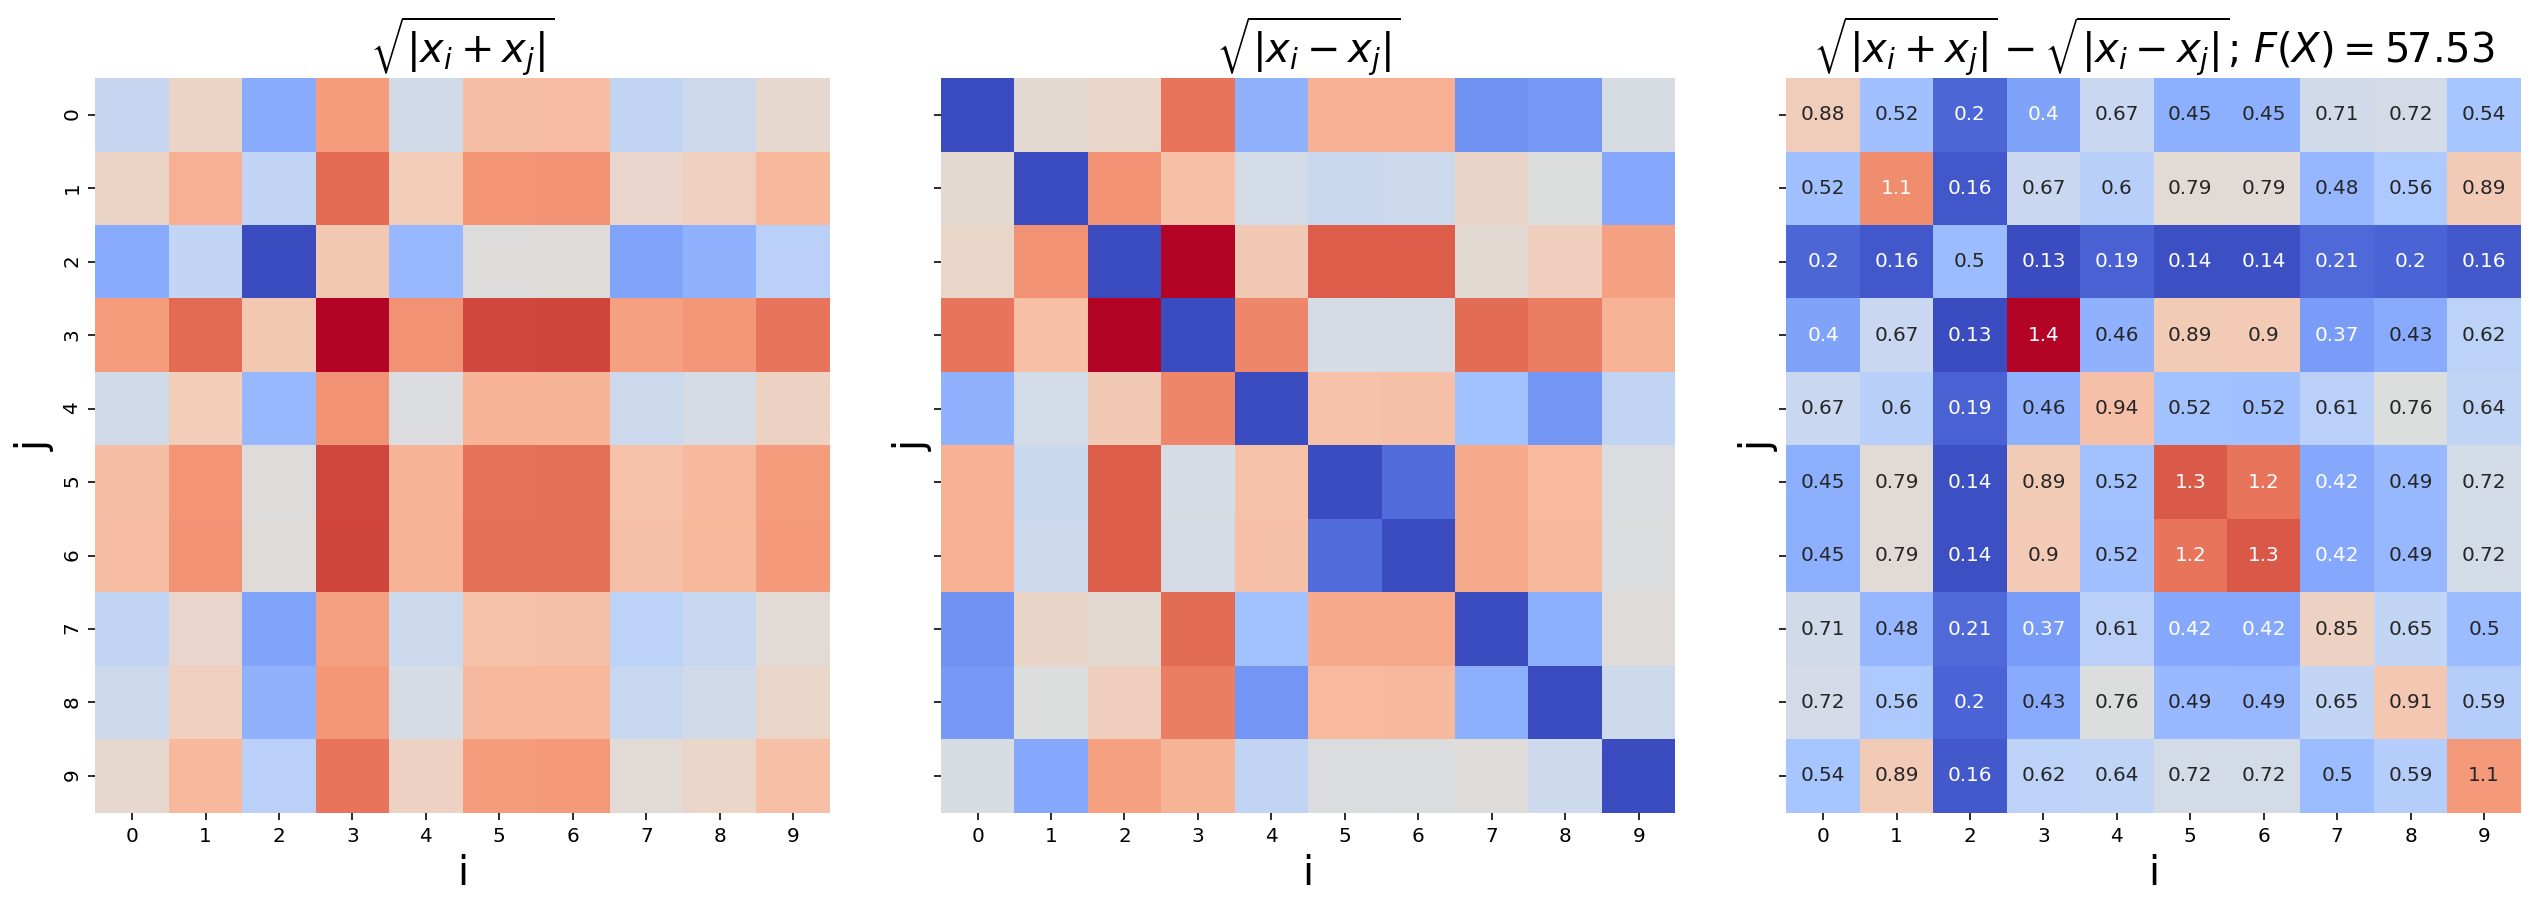

In [64]:
F, f1, f2 = get_F(X)
plot_heatmaps(F, f1, f2)

Now without loss of generality we can assume that $x_i$ are sorted in ascending order, i.e.

$x_1 \le x_2 \le ... \le x_n$

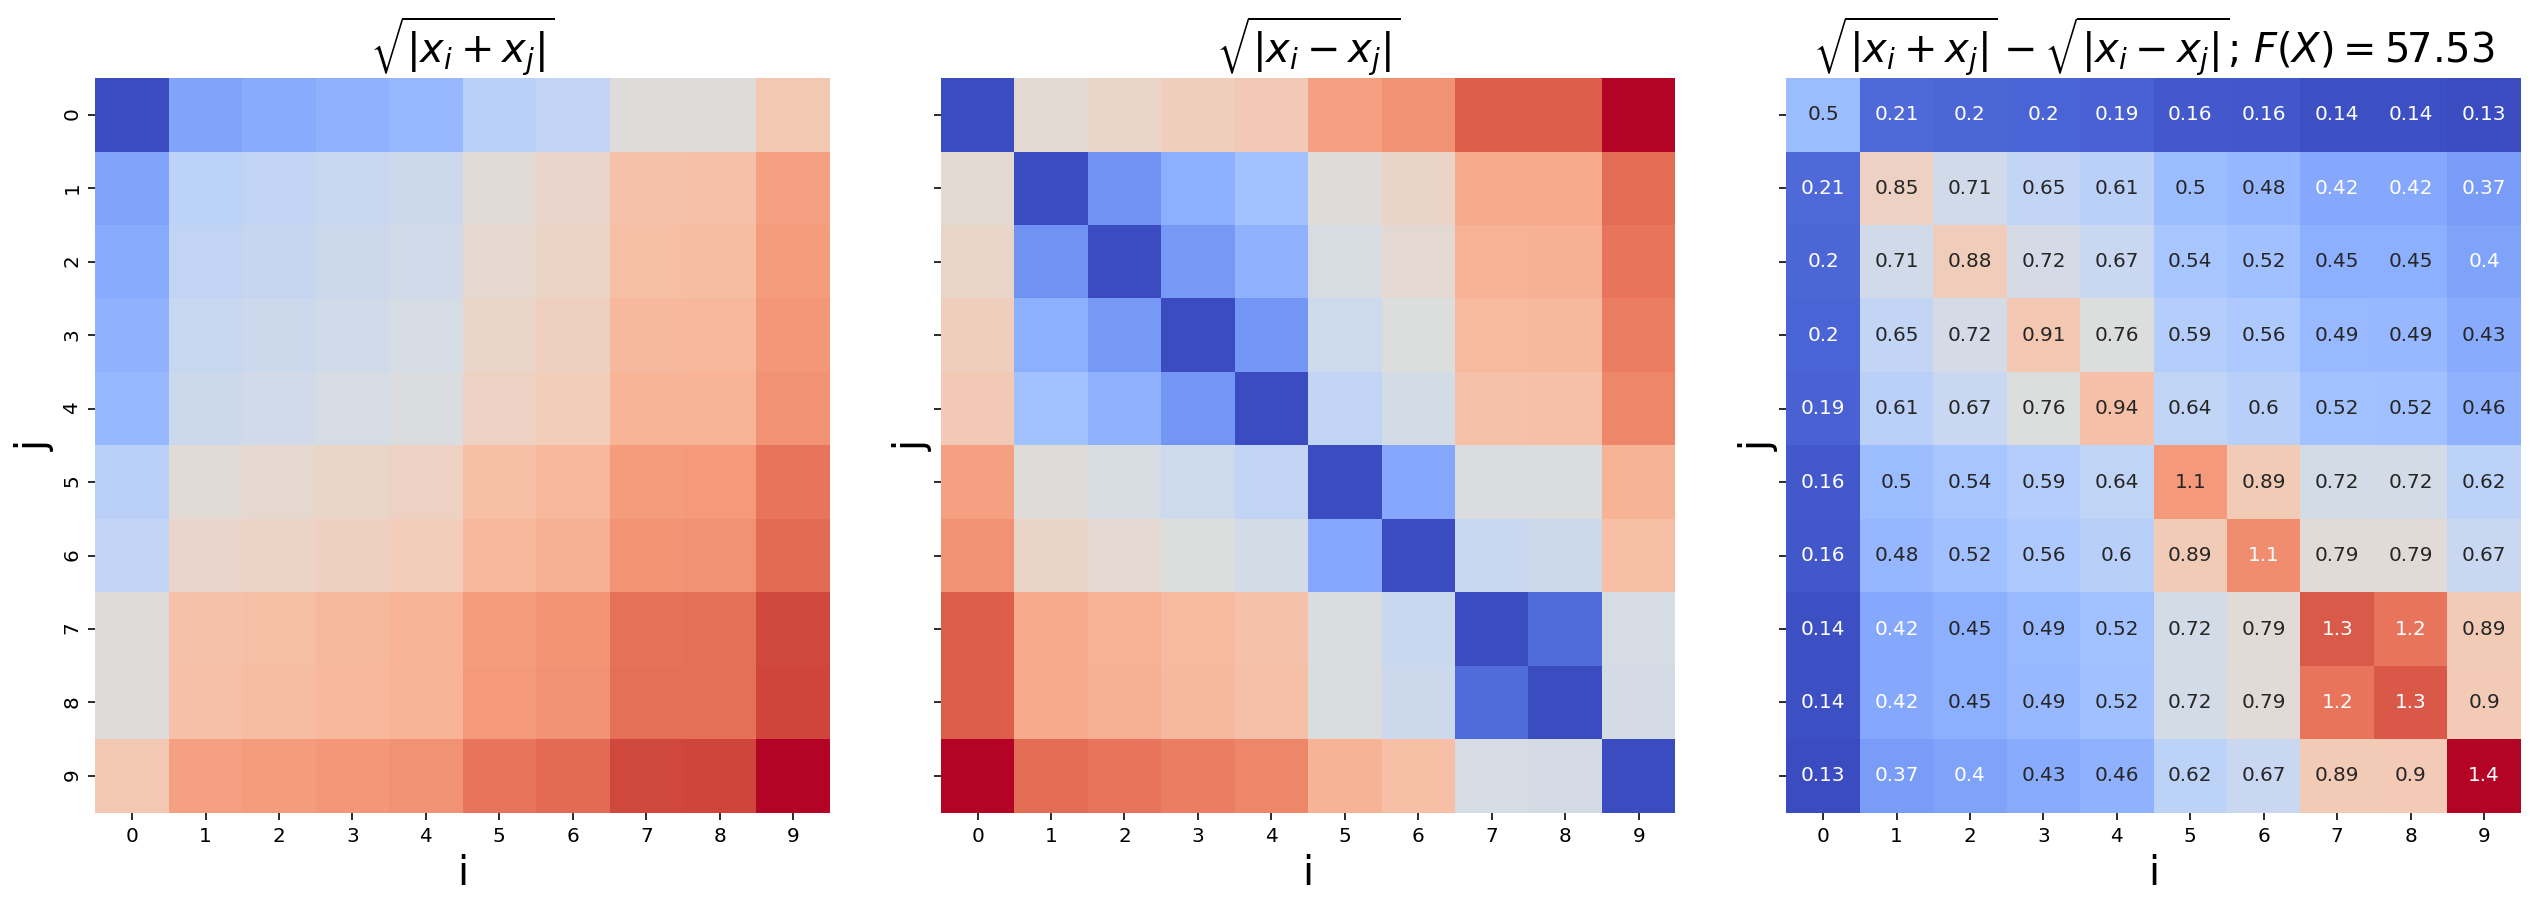

In [65]:
X = np.sort(X, axis=0)
F, f1, f2 = get_F(X)
plot_heatmaps(F, f1, f2)

Lets now come back to 

$
\begin{equation}
F(X) = \sum_{i=1}^{n} \color{blue}{\sqrt{2}\sqrt{|x_i|}} + 2*\sum_{i=1}^{n} \sum_{j=i+1}^{n} \color{blue}{\sqrt{|x_i + x_i|}} - \color{red}{\sqrt{|x_i - x_i|}} \\
\end{equation}
$

And focus on the term
$
\begin{equation}
2*\sum_{i=1}^{n} \sum_{j=i+1}^{n} \color{blue}{\sqrt{|x_i + x_i|}} - \color{red}{\sqrt{|x_i - x_i|}} \\
= 2*\sum_{i=1}^{n} \sum_{j=i+1}^{n} f(i,j); i < j, x_i \le x_j
\end{equation}
$


$
\begin{equation}
f(i,j) = \color{blue}{\sqrt{|x_i + x_j|}} - \color{red}{\sqrt{|x_i - x_j|}} \\
= \sqrt{|x_i|}(\color{blue}{\sqrt{|1 + \frac{x_j}{x_i}|}} - \color{red}{\sqrt{|1 - \frac{x_j}{x_i}|}}) \\
\end{equation}
$

Let $
\begin{equation}
r_{ij} = \Large{\frac{x_j}{x_i}} \\
\because x_j \ge x_i \\
\Rightarrow \Large{\frac{x_j}{x_i}} \ge 1 \\
\Rightarrow r_{ij} \ge 1 \\
f(i,j) = \sqrt{|x_i|}\left[\color{blue}{\sqrt{|1 + r_{ij}|}} - \color{red}{\sqrt{|1 - r_{ij}|}}\right]
\end{equation}
$

$
\begin{equation}
f(i,j) = \sqrt{|x_i|}\left[\color{blue}{\sqrt{|1 + r_{ij}|}} - \color{red}{\sqrt{|1 - r_{ij}|}}\right] \\
\because \sqrt{a} - \sqrt{b} = \Large{\frac{(\sqrt{a} - \sqrt{b})*(\sqrt{a} + \sqrt{b})}{\sqrt{a} + \sqrt{b}}} = \Large{\frac{a - b}{\sqrt{a} + \sqrt{b}}}\\
f(i,j) = \sqrt{|x_i|}\Large{\frac{\left[\color{blue}{{|1 + r_{ij}|}} - \color{red}{{|1 - r_{ij}|}}\right]}{\left[\color{blue}{\sqrt{|1 + r_{ij}|}} + \color{red}{\sqrt{|1 - r_{ij}|}}\right]}} \\
\end{equation}
$


$
\begin{equation}
f(i,j) = \sqrt{|x_i|}\Large{\frac{\left[\color{blue}{{|1 + r_{ij}|}} - \color{red}{{|1 - r_{ij}|}}\right]}{\left[\color{blue}{\sqrt{|1 + r_{ij}|}} + \color{red}{\sqrt{|1 - r_{ij}|}}\right]}} \\
\because r_{ij} \ge 1 \\
\Rightarrow 1 + r_{ij} \ge 2 \\
\Rightarrow |1 + r_{ij}| = 1 + r_{ij} \\
\end{equation}
$
Similarly,
$
\begin{equation}
-r_{ij} \le -1 \\
\Rightarrow 1 - r_{ij} \le 0 \\
\Rightarrow |1 - r_{ij}| = r_{ij} - 1 \\
\end{equation}
$


Using $|1 + r_{ij}| = 1 + r_{ij}$ and $|1 - r_{ij}| = r_{ij} - 1$


$
\begin{equation}
f(i,j) = \sqrt{|x_i|}\Large{\frac{\left[\color{blue}{{1 + r_{ij}}} - \color{red}{{r_{ij} + 1}}\right]}{\left[\color{blue}{\sqrt{|1 + r_{ij}|}} + \color{red}{\sqrt{|1 - r_{ij}|}}\right]}} \\
= \sqrt{|x_i|}\Large{\frac{2}{\left[\color{blue}{\sqrt{|1 + r_{ij}|}} + \color{red}{\sqrt{|1 - r_{ij}|}}\right]}} \\
\end{equation}
\Rightarrow f(i,j) \ge 0
$


Substituting $f(i,j) \ge 0$ in $F(X)$, we get the following:

$
\begin{equation}
F(X) = \sum_{i=1}^{n} \color{blue}{\sqrt{2}\sqrt{|x_i|}} + 2*\sum_{i=1}^{n} \sum_{j=i+1}^{n} f(i,j) \\
\ge \sum_{i=1}^{n} \color{blue}{\sqrt{2}\sqrt{|x_i|}} \ge 0 \\
\Rightarrow \Large{F(X) \ge 0}
\end{equation}
$

Hence, proved.

## Recap of core concepts

* Symmetrix Matrix view of the problem and decomposition of $F(X)$ using $f(i,j) = f(j,i)$ 
* Ordering of the $x_i$ to make the problem simpler
* Simplification of $\sqrt{a} - \sqrt{b} = \Large{\frac{(\sqrt{a} - \sqrt{b})*(\sqrt{a} + \sqrt{b})}{\sqrt{a} + \sqrt{b}}} = \Large{\frac{a - b}{\sqrt{a} + \sqrt{b}}}$
* Simplication of ${|1+r_{ij}|} = 1 + r_{ij}$ and ${|1 - r_{ij}|} = r_{ij} - 1$, if $r_{ij} \ge 1$.



# More videos to come


<p>
<center>Shubhanshu Mishra (<a href="https://shubhanshu.com">shubhanshu.com</a>)</center>

![Twitter Follow](https://img.shields.io/twitter/follow/TheShubhanshu?style=social) ![YouTube Channel Subscribers](https://img.shields.io/youtube/channel/subscribers/UCZpSoW1pm0jk-jUaGwVWzLA?style=social)
    
</p>

## References


* International Mathematics Olympiad 2021 Problems - https://www.imo-official.org/problems.aspx